[link text](https:// [link text](https://))Implementación, basada en: https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/ y https://www.youtube.com/watch?v=W8AeOXa_FqU&ab_channel=DotCSV

importar librerias

In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

Se crea los pesos de manera aleatoria, tanto bias (b) y pesos (W)

In [5]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f

    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1


Se define la función para definir la topologia de la red neuronal

In [6]:
topology = [2,3,4]
def create_nn( topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

Se definen las funciones de activación

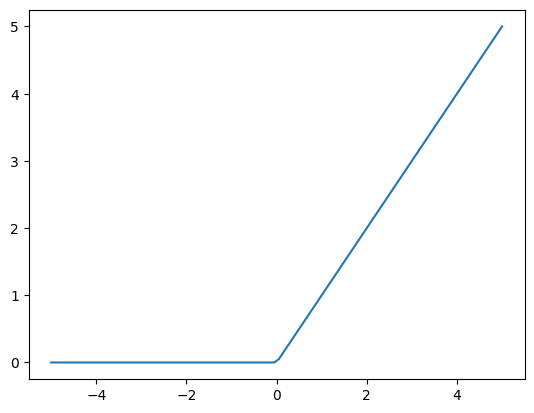

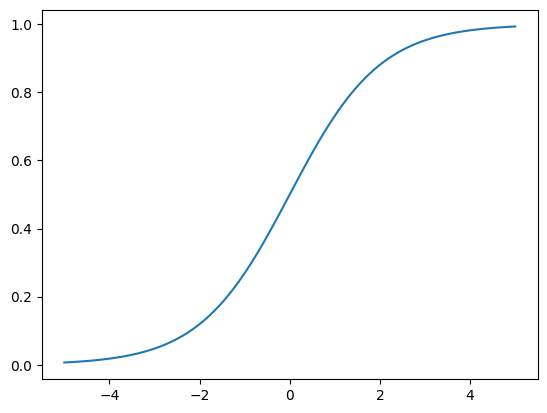

In [7]:
sign = (lambda x: 1/(1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))
plt.show()

plt.plot(_x, sign[0](_x))
plt.show()

Se crea un conjunto de datos de prueba

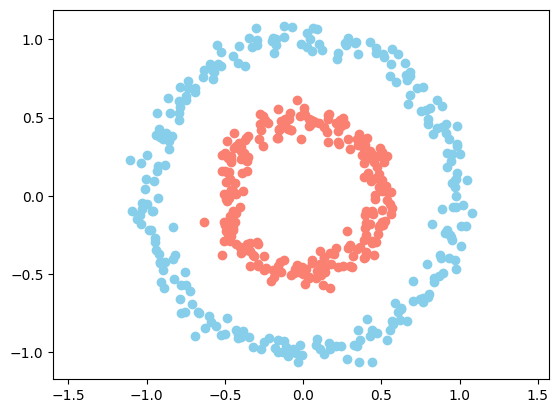

In [8]:
# crear el conjunto d ¡e datos

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[ Y[:,0] == 0, 0], X[ Y[:,0] == 0, 1], c ="skyblue")
plt.scatter(X[ Y[:,0] == 1, 0], X[ Y[:,0] == 1, 1], c ="salmon")
plt.axis("equal")
plt.show()

Se define el entrenamiento de la red neuronal

In [10]:
topology = [p, 4, 4, 1]

neural_net = create_nn(topology, sign)

l2_cost = (lambda Yp, Yr: np.mean((Yr - Yp)**2),
           lambda Yp, Yr: (Yr - Yp))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = []

  #Forward pass

  for l in range(len(neural_net)):

    if(l == 0):
      z = np.dot(X, neural_net[l].W) + neural_net[l].b
    else:
      z = np.dot(out[-1][1], neural_net[l].W) + neural_net[l].b

    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  if train:

    #backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      #print("l", l)
      z = out[l][0]
      a = out[l][1]

      if(l == (len(neural_net) - 1)):
        deltas.insert(0, l2_cost[1](a, Y)*neural_net[l].act_f[1](a))

        #E = y-output
        #Slope_output_layer= derivatives_sigmoid(output)
        #d_output = E * slope_output_layer
      else:
        #Slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
        #Error_at_hidden_layer = matrix_dot_product(d_output, wout.Transpose)
        #d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer

        #deltas.insert(0,  (deltas[0] @ _W.T) * neural_net[l].act_f[1](a))
        deltas.insert(0,  np.dot(deltas[0], _W.T) * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      #gradiente descent

      if(l == 0):
        #wout = wout + matrix_dot_product(hiddenlayer_activations.Transpose, d_output)*learning_rate
        #wh =  wh+ matrix_dot_product(X.Transpose,d_hiddenlayer)*learning_rate
        neural_net[l].b = neural_net[l].b + np.sum(deltas[0], axis=0, keepdims=True) * lr
        neural_net[l].W = neural_net[l].W + np.dot(X.T, deltas[0]) * lr
      else:
        #bh = bh + sum(d_hiddenlayer, axis=0) * learning_rate
        #bout = bout + sum(d_output, axis=0)*learning_rate
        neural_net[l].b = neural_net[l].b + np.sum(deltas[0], axis=0, keepdims=True) * lr
        neural_net[l].W = neural_net[l].W + np.dot(out[l-1][1].T, deltas[0]) * lr
  return out[-1][1]

a = train(neural_net, X, Y, l2_cost, 0.5)

Se crea la visualización de los datos

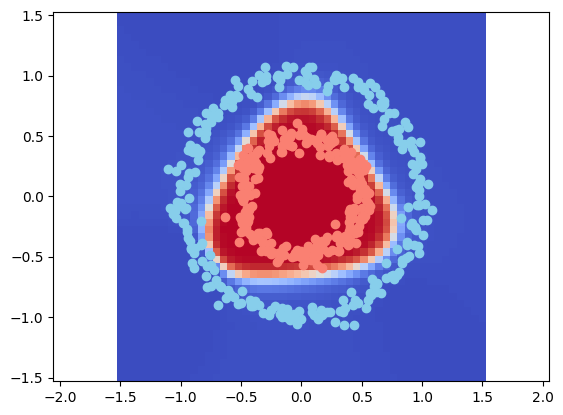

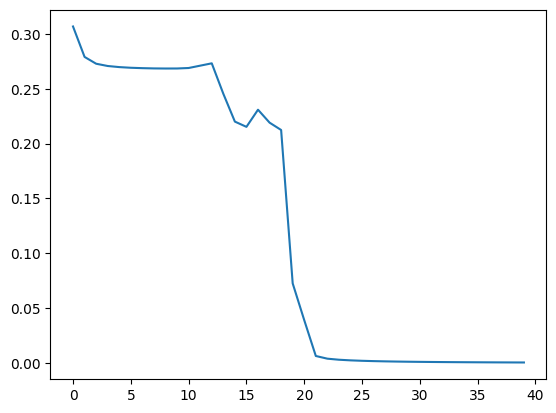

In [12]:
import time
from IPython.display import clear_output

topology = [p, 5, 5, 1]

neural_n = create_nn(topology, sign)
loss = []

for i in range(1000):

  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.07)

  if(i%25 == 0):
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")

    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)




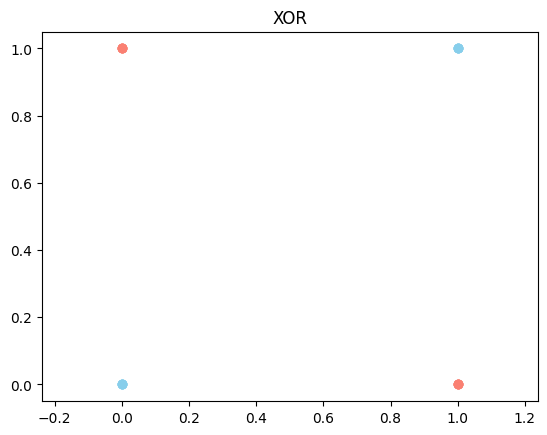

In [13]:
X = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0], [1, 0], [1, 1], [0, 1], [0, 0], [1, 0], [1, 1], [0, 1], [0, 0], [1, 0], [1, 1], [0, 1], [0, 0], [1, 0], [1, 1], [0, 1]])
Y = np.array([[0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1]])
#X = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
#Y = np.array([[0], [1], [0], [1]])

plt.scatter(X[ Y[:,0] == 0, 0], X[ Y[:,0] == 0, 1], c ="skyblue")
plt.scatter(X[ Y[:,0] == 1, 0], X[ Y[:,0] == 1, 1], c ="salmon")
plt.title("XOR")
plt.axis("equal")
plt.show()

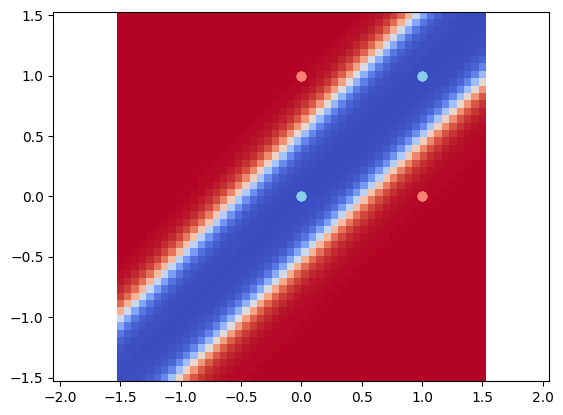

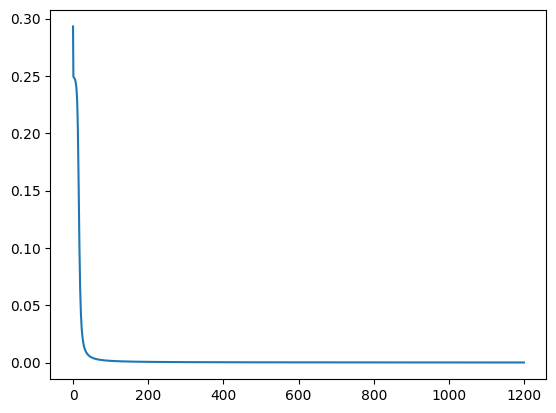

In [ ]:
import time
from IPython.display import clear_output

topology = [p, 2, 1]

neural_n = create_nn(topology, sign)
loss = []

for i in range(30000):

  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.1)

  if(i%25 == 0):
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")

    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)